# Machine Learning  - KNN

#### Notes

Classification vs. Clustering:
In classification you know at the beginning how many classes you should have at the end.  The target is learned from labeled data.  In clustering you do not know at the beginning the appropriate number of clusters in which to divid the data.  You rely on the algorithm to determine the best number of clusters of unlabled data.

Two types:
1.  Hierarchical - Algorithms create nested clusters
2.  Partitional - Algorithms create a single set of clusters with no nested levels.

This notebook uses the k-nearest neighbor clustering algorithm.  It is run without any foreknowledge of the clusters, but because we have the target values, we can test the accuracy.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as pyplt
import sklearn
import seaborn as sns
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load and describe iris database
iris_dataset = load_iris()

print(iris_dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
# Create dataframe of features
iris = pd.DataFrame(iris_dataset['data'], columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [4]:
# Create list of target values
target_values = list(iris_dataset.target)
iris['target'] = target_values

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


What are the types of targets in the data?

In [7]:
print(iris['target'].unique())

[0 1 2]


How many of each target exist?

In [8]:
print(iris['target'].value_counts())

2    50
1    50
0    50
Name: target, dtype: int64


This dataset is well-balanced.  Data frequently are unbalanced, but balanced data are nice for beginners.

Describe the dataset

In [9]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Group and describe by each target value 

In [10]:
iris.groupby('target').describe().T

target                      0          1          2
sepal_length count  50.000000  50.000000  50.000000
             mean    5.006000   5.936000   6.588000
             std     0.352490   0.516171   0.635880
             min     4.300000   4.900000   4.900000
             25%     4.800000   5.600000   6.225000
             50%     5.000000   5.900000   6.500000
             75%     5.200000   6.300000   6.900000
             max     5.800000   7.000000   7.900000
sepal_width  count  50.000000  50.000000  50.000000
             mean    3.428000   2.770000   2.974000
             std     0.379064   0.313798   0.322497
             min     2.300000   2.000000   2.200000
             25%     3.200000   2.525000   2.800000
             50%     3.400000   2.800000   3.000000
             75%     3.675000   3.000000   3.175000
             max     4.400000   3.400000   3.800000
petal_length count  50.000000  50.000000  50.000000
             mean    1.462000   4.260000   5.552000
             std     0.173664   0.469911   0.551895
             min     1.000000   3.000000   4.500000
             25%     1.400000   4.000000   5.100000
             50%     1.500000   4.350000   5.550000
             75%     1.575000   4.600000   5.875000
             max     1.900000   5.100000   6.900000
petal_width  count  50.000000  50.000000  50.000000
             mean    0.246000   1.326000   2.026000
             std     0.105386   0.197753   0.274650
             min     0.100000   1.000000   1.400000
             25%     0.200000   1.200000   1.800000
             50%     0.200000   1.300000   2.000000
             75%     0.300000   1.500000   2.300000
             max     0.600000   1.800000   2.500000

Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024AF1974B08>,
      dtype=object)

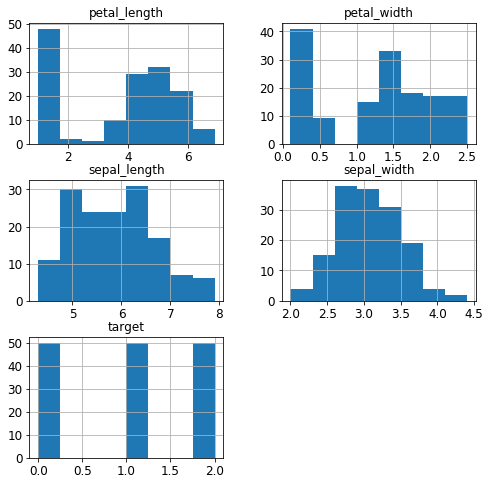

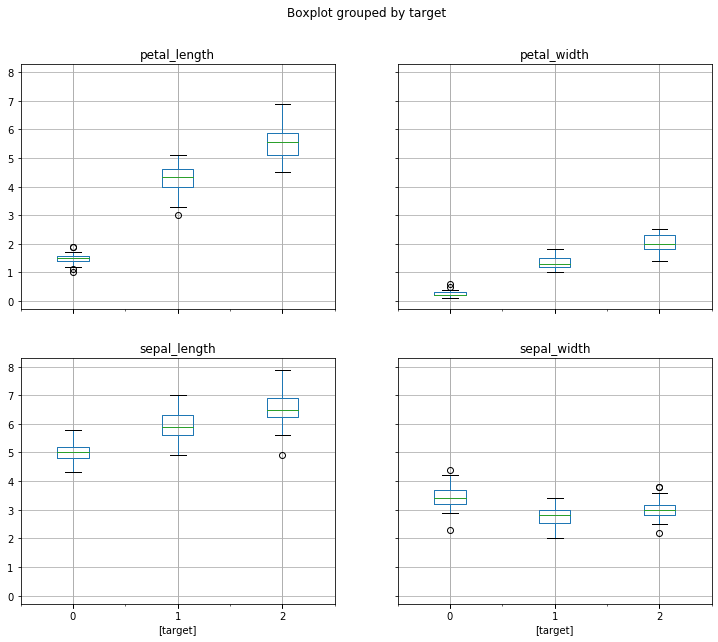

In [11]:
iris.hist(figsize = (8,8), bins = 8, xlabelsize=12, ylabelsize=12)
iris.boxplot(by='target', figsize=(12,10))

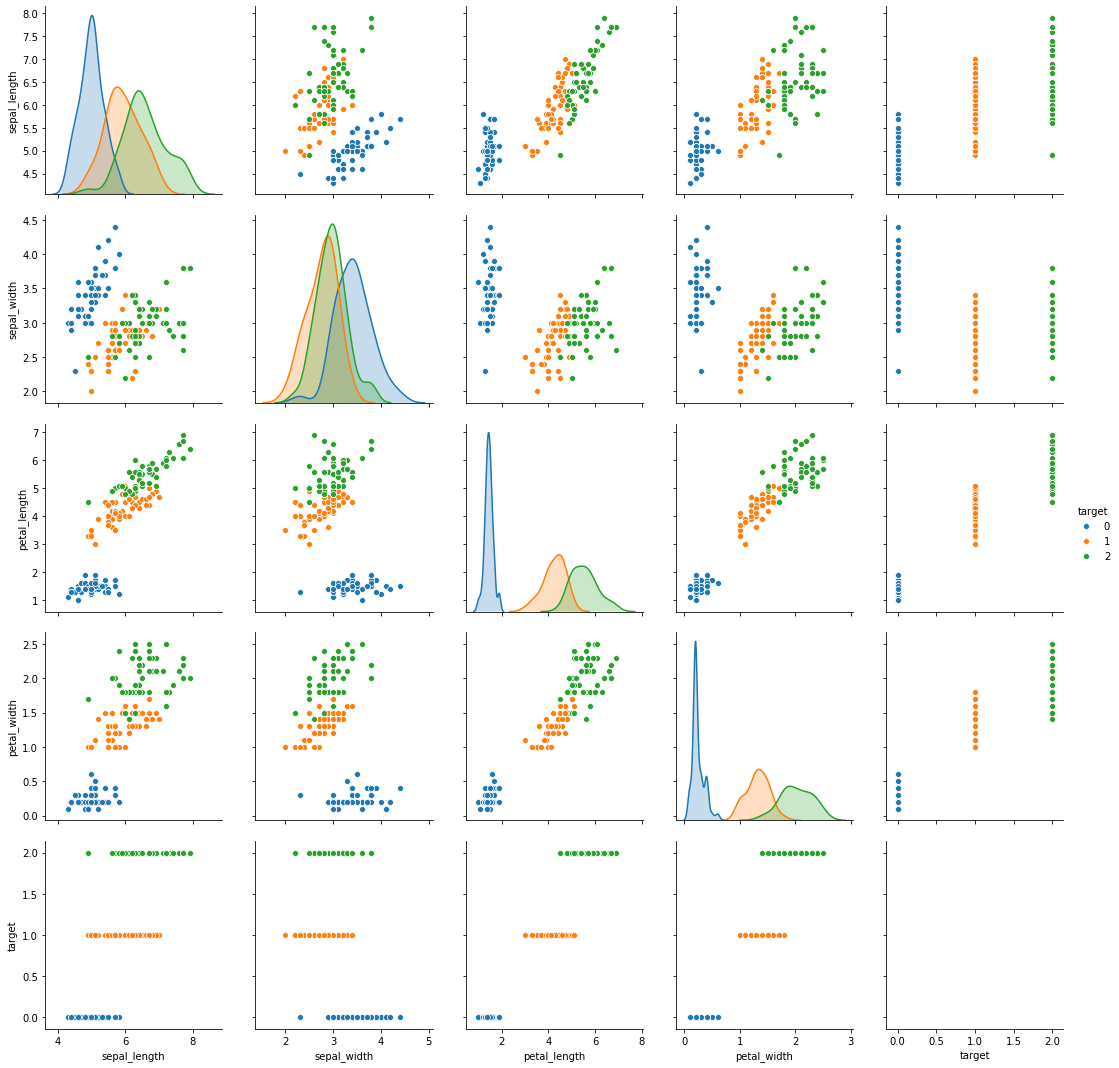

In [12]:
sns.pairplot(iris, hue='target', height=3)

Prepare data for Machine Learning

In [13]:
# Get the feature vector
X = iris.drop(labels='target', axis=1)

# Get the target vector
y = iris['target']

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Create an instance of the knn algorithm and run the model

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Create a new iris to identify

In [17]:
X_new = np.array([[3, 1.5, 1, 0.3]])

prediction = knn.predict(X_new)
print(prediction)

[0]


Test model predictions

In [18]:
y_pred = knn.predict(X_test)
print(y_pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


In [19]:
# Accuracy score
print(knn.score(X_test, y_test))

0.9777777777777777
